In [1]:
## Importing required libraries

import numpy as np   # Used for mathematical Computation
import pandas as pd  # Used to create dataframe and preprocessing of data
import sklearn.cluster as sklc  # Used to make clusters of unlabelled data 
from sklearn.manifold import TSNE  # T-distributed Stochastic Neighbor Embedding (It converts similarities between data points to joint probabilities)
from sklearn.preprocessing import MinMaxScaler  # MinMaxScaler preserves the shape of the original array

In [2]:
## to load and the data
data = pd.read_csv("features_flight_heli.csv")
data

,fname,alt_max,vert_acc,horiz_speed,dist,is_maneuver
0,./Flight_Heli_data\24910003_dali_airport_to_gu...,9479.0,-0.143793,241.277903,12.318341,0
1,./Flight_Heli_data\24910005_sanya_phoenix_inte...,10104.0,0.537735,171.344710,17.558203,1
2,./Flight_Heli_data\2491000a_shenyang_taoxian_i...,3650.0,-1.418815,123.471539,0.605749,1
3,./Flight_Heli_data\2491000b_xi'an_xianyang_int...,9479.0,-0.000318,235.397455,13.761831,1
4,./Flight_Heli_data\2491000c_millington_regiona...,10066.0,-0.208709,135.173804,13.815511,1
...,...,...,...,...,...,...
6860,./Flight_Heli_data\24918006_morris_municipal_a...,2469.0,0.181785,92.123657,1.564857,1
6861,./Flight_Heli_data\24918007_denver_rocky_mount...,1951.0,0.468371,50.284213,0.009237,1
6862,./Flight_Heli_data\24918008_dubai_internationa...,11887.0,0.136948,167.475798,20.068998,1
6863,./Flight_Heli_data\2491800d_chicago_rockford_i...,12200.0,-0.398034,224.874423,15.944458,1


In [3]:
data.describe()

,alt_max,vert_acc,horiz_speed,dist,is_maneuver
count,6865.000000,6865.000000,6865.000000,6865.000000,6865.000000
mean,7737.832775,0.051615,159.695620,14.772236,0.743481
std,3655.392669,1.013029,91.309454,32.919278,0.436743
min,0.000000,-34.009343,2.067290,0.000008,0.000000
25%,5707.000000,-0.170755,111.975752,2.671836,0.000000
50%,8877.000000,0.040793,159.349946,7.402208,1.000000
75%,10676.000000,0.316568,196.101905,13.471673,1.000000
max,18105.000000,14.471249,3104.974164,345.176024,1.000000


In [4]:
scaler = MinMaxScaler()
## transforming the data using MinMaxScalar 
data_matrix = scaler.fit_transform(data.drop(['fname'], axis = 1).values)

In [5]:
## to convert into array
data_matrix = np.asarray(data_matrix)

In [6]:
## using k means algo to fit on data with various parameter
## 5 = defining the number of clusters to be formed
## n_init = Number of time the k-means algorithm will be run with different centroid seeds
## max_iter = Maximum number of iterations of the k-means algorithm for a single run

Cluster = sklc.KMeans(5, n_init = 100, max_iter = 2000, algorithm = 'elkan').fit(data_matrix)

In [7]:
## assigning the labels to cluster
kmeans_labels = Cluster.labels_

In [8]:
## assigning the cluster_Id to lable
data['Cluster_id'] = kmeans_labels

In [9]:
## creating the groups with respect to cluster Id

groups = data.groupby(['Cluster_id'])

In [10]:
## to get the list of groups with id 0
groups.get_group(0)

,fname,alt_max,vert_acc,horiz_speed,dist,is_maneuver,Cluster_id
31,./Flight_Heli_data\24910038_chicago_o'hare_int...,11285.0,0.155551,321.801104,126.103571,1,0
47,./Flight_Heli_data\24910056_houston_george_bus...,11895.0,0.018848,317.180860,124.616325,1,0
102,./Flight_Heli_data\249100b8_mexico_city_intern...,11887.0,0.320355,264.512472,108.921423,1,0
131,./Flight_Heli_data\24910108_tokyo_narita_inter...,10081.0,0.122850,392.092821,291.481019,1,0
159,./Flight_Heli_data\2491014b_magadan_sokol_airp...,11582.0,0.072151,295.778591,113.390507,1,0
...,...,...,...,...,...,...,...
6634,./Flight_Heli_data\24913e7a_seoul_incheon_inte...,12504.0,-0.017777,458.886140,209.850823,1,0
6726,./Flight_Heli_data\24913f82_memphis_internatio...,12504.0,0.028817,281.541282,145.644802,1,0
6789,./Flight_Heli_data\24915014_beijing_capital_in...,12192.0,1.278349,341.744755,123.556692,1,0
6810,./Flight_Heli_data\24916001_sydney_kingsford_s...,12192.0,0.226295,203.777780,112.589751,1,0


In [11]:
## fitting and transforming the TSNE algo on our data 

X_embedded = TSNE(n_components = 2).fit_transform(data_matrix)

C:\Users\Abhishek Gupta\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\Abhishek Gupta\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [12]:
## creating the list all values we get using TSNE algo and then converting it into array

l = []
for i in range(5):
    new_list = []
    l.append(new_list)
for i, x in enumerate(X_embedded):
    l[kmeans_labels[i]].append(x)
for i in range(5):
    l[i] = np.asarray(l[i])

In [13]:
l = np.asarray(l)

In [14]:
l

array([array([[ -26.986343 ,  -38.866486 ],
       [ -25.808558 ,  -39.897514 ],
       [ -23.536829 ,  -37.95102  ],
       [-100.57627  ,   -7.489264 ],
       [ -25.040497 ,  -37.818775 ],
       [-100.02731  ,  -10.449834 ],
       [ -98.97717  ,   -6.3145885],
       [ -98.19616  ,   -9.53133  ],
       [ -98.735634 ,   -9.165297 ],
       [ -25.694649 ,  -38.541767 ],
       [ -99.6776   ,   -7.99969  ],
       [ -25.158974 ,  -40.43774  ],
       [ -94.85718  ,  -13.869087 ],
       [-100.08519  ,   -8.550393 ],
       [ -99.39765  ,   -8.620682 ],
       [ -94.247    ,  -14.599823 ],
       [ -24.853777 ,  -37.55467  ],
       [-100.29021  ,   -8.017905 ],
       [ -23.980062 ,  -36.464695 ],
       [ -24.54246  ,  -40.19011  ],
       [ -25.156364 ,  -38.115723 ],
       [-100.14083  ,  -14.321416 ],
       [ -27.80308  ,  -40.648956 ],
       [ -93.991776 ,  -14.815645 ],
       [ -24.445404 ,  -37.14958  ],
       [ -27.40691  ,  -38.43381  ],
       [ -27.137175 ,  -35.9086

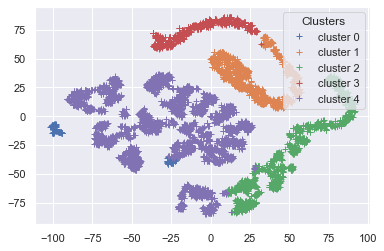

In [15]:
import matplotlib.pyplot as plt  ## used for visualization of data
import seaborn as sns  ## used for visualization of data
sns.set(style = 'darkgrid') ## setting the style to drakgrid mode
plt.figure() ## initialization of fig 
for i,x in enumerate(l):
    ## plotting data x_axis values, y_axis values, 
    ## "+" = marker
    plt.plot(x[:,0], x[:,1], '+', linewidth = 2.5, label = 'cluster '+ str(i))
plt.legend(title = 'Clusters', loc = 'upper right')
plt.grid(color='white', linewidth=1)
plt.plot()
#plt.show()
plt.savefig('output/data_cluster', dpi = 1000)